In [21]:
import sklearn
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt

In [22]:
games = pd.read_csv('./games.csv', ';')
#print(games.head(5))
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50286 entries, 0 to 50285
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameDuration        50286 non-null  int64
 1   firstBlood          50286 non-null  int64
 2   firstTower          50286 non-null  int64
 3   firstInhibitor      50286 non-null  int64
 4   firstBaron          50286 non-null  int64
 5   firstDragon         50286 non-null  int64
 6   firstRiftHerald     50286 non-null  int64
 7   t1_towerKills       50286 non-null  int64
 8   t1_inhibitorKills   50286 non-null  int64
 9   t1_baronKills       50286 non-null  int64
 10  t1_dragonKills      50286 non-null  int64
 11  t1_riftHeraldKills  50286 non-null  int64
 12  t2_towerKills       50286 non-null  int64
 13  t2_inhibitorKills   50286 non-null  int64
 14  t2_baronKills       50286 non-null  int64
 15  t2_dragonKills      50286 non-null  int64
 16  t2_riftHeraldKills  50286 non-null  int6

/home/diegoflm/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [23]:
# Cuantitative variables (integer)
games.select_dtypes(include=['int64']).describe()

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,winner
count,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000
mean,1871.386032,1.487233,1.485125,1.339578,0.948693,1.477270,0.749195,5.835163,1.041781,0.381200,1.420356,0.257487,5.681999,1.008611,0.424472,1.437975,0.245854,1.493776
std,450.876052,0.499842,0.500499,0.652960,0.838988,0.530346,0.824393,3.740575,1.269064,0.588001,1.201740,0.437254,3.809336,1.261867,0.617672,1.219412,0.430597,0.499966
min,610.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1554.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1846.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2156.750000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,0.000000,2.000000
max,4728.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,11.000000,10.000000,5.000000,6.000000,1.000000,11.000000,10.000000,4.000000,6.000000,1.000000,2.000000


# Split training data from test data: 80% for training, 20% for testing.

In [24]:
from sklearn.model_selection import train_test_split
N=len(games)
cTrain=int(N*0.8) # 80% for training and 20% for testing
cTest=N-cTrain
print(N,cTrain,cTest)
train_data, test_data = sklearn.model_selection.train_test_split(games, train_size=cTrain, test_size=cTest)

50286 40228 10058


In [25]:
train_data.shape
#train_data.head()

(40228, 18)

# Pipeline for categorical attributes

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [27]:
#6 categorical attributes, where the numeric values don't have a numerical meaning.
cat_atts = ['firstBlood','firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald']
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False))
    ])

# Pipeline for numeric attributes

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [29]:
#10 numeric attributes
#num_atts = ['gameDuration', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 
num_atts =                  ['t1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 
        't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 
        't2_riftHeraldKills']

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())    #Standarization by centering and scaling.
    ])

# Full Pipeline

In [30]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_atts),
    ("cat", cat_pipeline, cat_atts), 
])

In [31]:
X_train = full_pipeline.fit_transform(train_data)

In [32]:
X_train.shape

(40228, 27)

In [33]:
X_train[0,:]

array([ 0.84667577,  0.75530919, -0.65025213,  0.48215189, -0.59001977,
        0.34616121, -0.00580028,  0.93397853,  0.46176791, -0.57019315,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ])

In [34]:
y_train = train_data["winner"]
y_train

15802    2
27284    1
39097    1
21726    2
10644    2
        ..
25488    1
12135    2
17632    2
29618    2
14548    1
Name: winner, Length: 40228, dtype: int64

# Neuronal network training models

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [36]:
model1 = MLPClassifier(activation='identity',solver='lbfgs', alpha=1e-5,
    hidden_layer_sizes=(4,7), random_state=123)

model1.fit(X_train, y_train)
scores1 = cross_val_score(model1, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(scores1)
scores1.mean()

[-0.02759135 -0.02348993 -0.02908277 -0.02945929 -0.02573027]


-0.027070723081251108

In [37]:
modelo2 = MLPClassifier(activation='relu',solver='sgd', alpha=1e-5,hidden_layer_sizes=(3, 3, 3, 3), random_state=123)
modelo2.fit(X_train, y_train)
scores2 = cross_val_score(modelo2, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(scores2)
scores2.mean()

[-0.02199851 -0.02150137 -0.02522993 -0.02635177 -0.02224984]


-0.023466283907927182

In [38]:
model3 = MLPClassifier(activation='tanh',solver='adam', alpha=1e-5,hidden_layer_sizes=(5, 5, 5, 5, 5), random_state=123)
model3.fit(X_train, y_train)
scores3 = cross_val_score(model3, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(scores3)
scores3.mean()

[-0.02075565 -0.01963709 -0.02075565 -0.02125544 -0.02249845]


-0.020980456223823024

In [39]:
model4 = MLPClassifier(activation='tanh',solver='adam', alpha=1e-5,hidden_layer_sizes=(4, 10, 3), random_state=123)
model4.fit(X_train, y_train)
scores4 = cross_val_score(model4, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(scores4)
scores4.mean()

[-0.02050708 -0.01963709 -0.02162565 -0.02249845 -0.01963953]


-0.020781559482324057

In [40]:
model5 = MLPClassifier(activation='tanh',solver='sgd', alpha=1e-5,hidden_layer_sizes=(1), random_state=123)
model5.fit(X_train, y_train)
scores5 = cross_val_score(model5, X_train, y_train, cv=5, scoring='neg_mean_absolute_error') #neg_mean_absolute_error
print(scores5)
scores5.mean()

[-0.02734278 -0.02386279 -0.02957992 -0.02908639 -0.02622747]


-0.027219868602026843

# On the test set:

In [41]:
X_test = full_pipeline.transform(test_data)
X_test

array([[-1.02422813, -0.82085878, -0.65025213, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.38121974,  2.33147715, -0.65025213, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.57940378, -0.0327748 ,  2.75822304, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.75695615, -0.82085878, -0.65025213, ...,  1.        ,
         0.        ,  0.        ],
       [-0.48968416, -0.82085878, -0.65025213, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.11394775,  0.75530919, -0.65025213, ...,  0.        ,
         1.        ,  0.        ]])

In [42]:
y_pred1 = model1.predict(X_test)  
y_pred1

array([2, 1, 1, ..., 2, 2, 1])

In [43]:
y_pred2 = modelo2.predict(X_test)  
y_pred2

array([2, 1, 1, ..., 2, 2, 1])

In [44]:
y_pred3 = model3.predict(X_test)  
y_pred3

array([2, 1, 1, ..., 2, 2, 1])

In [45]:
y_pred4 = model4.predict(X_test)  
y_pred4

array([2, 1, 1, ..., 2, 2, 1])

In [46]:
y_pred5 = model5.predict(X_test)  
y_pred5

array([2, 1, 1, ..., 2, 2, 1])

In [47]:
y_test = test_data["winner"]

# Results

In [48]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred1
       )
print(f"Mean Absolute Error for model1: {mae}")

Mean Absolute Error for model1: 0.024855836150328096


In [49]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred2
       )
print(f"Mean Absolute Error for model2: {mae}")

Mean Absolute Error for model2: 0.021376019089282165


In [50]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred3
       )
print(f"Mean Absolute Error for model3: {mae}")

Mean Absolute Error for model3: 0.02117717240007954


In [51]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred4
       )
print(f"Mean Absolute Error for model4: {mae}")

Mean Absolute Error for model4: 0.018492742095844103


In [52]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred5
       )
print(f"Mean Absolute Error for model5: {mae}")

Mean Absolute Error for model5: 0.024855836150328096


In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.975144163849672

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.9786239809107178

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred3)

0.9788228275999205

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred4)

0.9815072579041559

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred5)

0.975144163849672

In [58]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

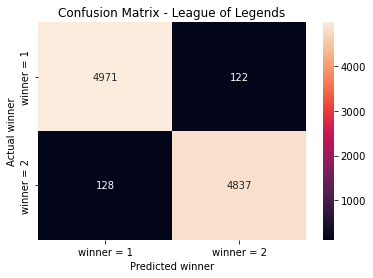

In [59]:
%matplotlib inline
confusion_matrix1 = confusion_matrix(y_test, y_pred1)

ax = plt.subplot()
sns.heatmap(confusion_matrix1, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted winner')
ax.set_ylabel('Actual winner') 
ax.set_title('Confusion Matrix - League of Legends') 
ax.xaxis.set_ticklabels(['winner = 1', 'winner = 2'])
ax.yaxis.set_ticklabels(['winner = 1', 'winner = 2']);
plt.show();

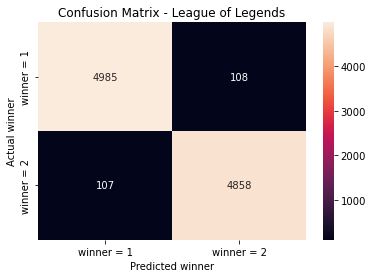

In [60]:
%matplotlib inline
confusion_matrix2 = confusion_matrix(y_test, y_pred2)

ax = plt.subplot()
sns.heatmap(confusion_matrix2, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted winner')
ax.set_ylabel('Actual winner') 
ax.set_title('Confusion Matrix - League of Legends') 
ax.xaxis.set_ticklabels(['winner = 1', 'winner = 2'])
ax.yaxis.set_ticklabels(['winner = 1', 'winner = 2']);
plt.show();

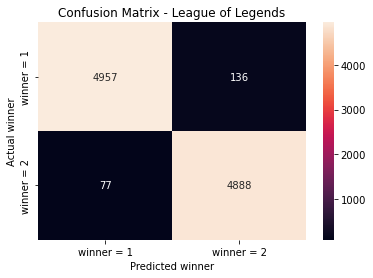

In [61]:
%matplotlib inline
confusion_matrix3 = confusion_matrix(y_test, y_pred3)

ax = plt.subplot()
sns.heatmap(confusion_matrix3, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted winner')
ax.set_ylabel('Actual winner') 
ax.set_title('Confusion Matrix - League of Legends') 
ax.xaxis.set_ticklabels(['winner = 1', 'winner = 2'])
ax.yaxis.set_ticklabels(['winner = 1', 'winner = 2']);
plt.show();

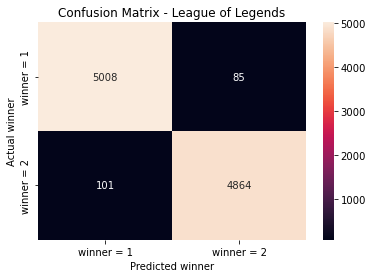

In [62]:
%matplotlib inline
confusion_matrix4 = confusion_matrix(y_test, y_pred4)

ax = plt.subplot()
sns.heatmap(confusion_matrix4, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted winner')
ax.set_ylabel('Actual winner') 
ax.set_title('Confusion Matrix - League of Legends') 
ax.xaxis.set_ticklabels(['winner = 1', 'winner = 2'])
ax.yaxis.set_ticklabels(['winner = 1', 'winner = 2']);
plt.show();

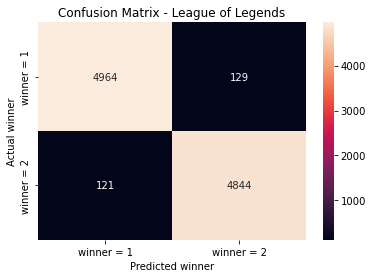

In [63]:
%matplotlib inline
confusion_matrix5 = confusion_matrix(y_test, y_pred5)

ax = plt.subplot()
sns.heatmap(confusion_matrix5, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted winner')
ax.set_ylabel('Actual winner') 
ax.set_title('Confusion Matrix - League of Legends') 
ax.xaxis.set_ticklabels(['winner = 1', 'winner = 2'])
ax.yaxis.set_ticklabels(['winner = 1', 'winner = 2']);
plt.show();

# Summary

In [64]:
#Accuracy & Confusion Matrix

from tabulate import tabulate
mydata = [
    ['Model', 'Accuracy', 'Confusion Matrix'],
      ['model1', accuracy_score(y_test, y_pred1), confusion_matrix1],
      ['model2', accuracy_score(y_test, y_pred2), confusion_matrix2],
      ['model3', accuracy_score(y_test, y_pred3), confusion_matrix3],
      ['model4', accuracy_score(y_test, y_pred4), confusion_matrix4],
      ['model5', accuracy_score(y_test, y_pred5), confusion_matrix5],
]
print(tabulate(mydata, tablefmt="grid"))

+--------+--------------------+------------------+
| Model  | Accuracy           | Confusion Matrix |
+--------+--------------------+------------------+
| model1 | 0.975144163849672  | [[4971  122]     |
|        |                    |  [ 128 4837]]    |
+--------+--------------------+------------------+
| model2 | 0.9786239809107178 | [[4985  108]     |
|        |                    |  [ 107 4858]]    |
+--------+--------------------+------------------+
| model3 | 0.9788228275999205 | [[4957  136]     |
|        |                    |  [  77 4888]]    |
+--------+--------------------+------------------+
| model4 | 0.9815072579041559 | [[5008   85]     |
|        |                    |  [ 101 4864]]    |
+--------+--------------------+------------------+
| model5 | 0.975144163849672  | [[4964  129]     |
|        |                    |  [ 121 4844]]    |
+--------+--------------------+------------------+


# Best model so far: model4

After removing the 'gameDuration' attribute, accuracies improved,  
and the highest accuracy is higher now. The model with best performance is model4.
'gameDuration' seems to be not useful for the predictions.
  
model4 = MLPClassifier( \
&emsp;    activation='tanh', \
&emsp;    solver='adam', \
&emsp;    alpha=1e-5, \
&emsp;    hidden_layer_sizes=(4, 10, 3), \
&emsp;    random_state=123) \
\
model4.fit(X_train, y_train) \
scores4 = cross_val_score( \
&emsp;    model4, \
&emsp;    X_train, \
&emsp;    y_train, \
&emsp;    cv=5, \
&emsp;    scoring='neg_mean_absolute_error') 

# Hyper-parameter variation

In [76]:
model4B = MLPClassifier(activation='tanh',solver='adam', alpha=1e-5,hidden_layer_sizes=(4, 10, 3), 
    random_state=123, n_iter_no_change = 15) #Variation from default value: n_iter_no_change = 10

model4B.fit(X_train, y_train)
scores4B = cross_val_score(model4B, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(scores4B)
scores4B.mean()

[-0.01913995 -0.01715138 -0.02100423 -0.02200124 -0.01963953]


-0.0197872642498301

In [77]:
model4C = MLPClassifier(activation='tanh',solver='adam', alpha=1e-5,hidden_layer_sizes=(4, 10, 3), 
    random_state=123, n_iter_no_change = 20) #Variation from default value: n_iter_no_change = 10

model4C.fit(X_train, y_train)
scores4C = cross_val_score(model4C, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(scores4C)
scores4C.mean()

[-0.0195128  -0.02000994 -0.02100423 -0.02237415 -0.01963953]


-0.020508128602363628

In [78]:
y_pred4B = model4B.predict(X_test)  
y_pred4B

array([2, 1, 1, ..., 2, 2, 1])

In [79]:
y_pred4C = model4C.predict(X_test)  
y_pred4C

array([2, 1, 1, ..., 2, 2, 1])

In [80]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred4B
       )
print(f"Mean Absolute Error for model4B: {mae}")

Mean Absolute Error for model3B: 0.018393318751242792


In [81]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred4C
       )
print(f"Mean Absolute Error for model4C: {mae}")

Mean Absolute Error for model3C: 0.017995625372837543


In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred4B)

0.9816066812487572

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred4C)

0.9820043746271625

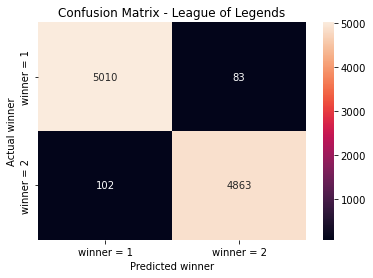

In [84]:
%matplotlib inline
confusion_matrix4B = confusion_matrix(y_test, y_pred4B)

ax = plt.subplot()
sns.heatmap(confusion_matrix4B, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted winner')
ax.set_ylabel('Actual winner') 
ax.set_title('Confusion Matrix - League of Legends') 
ax.xaxis.set_ticklabels(['winner = 1', 'winner = 2'])
ax.yaxis.set_ticklabels(['winner = 1', 'winner = 2']);
plt.show();

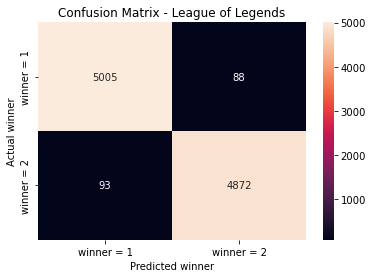

In [85]:
%matplotlib inline
confusion_matrix4C = confusion_matrix(y_test, y_pred4C)

ax = plt.subplot()
sns.heatmap(confusion_matrix4C, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted winner')
ax.set_ylabel('Actual winner') 
ax.set_title('Confusion Matrix - League of Legends') 
ax.xaxis.set_ticklabels(['winner = 1', 'winner = 2'])
ax.yaxis.set_ticklabels(['winner = 1', 'winner = 2']);
plt.show();

# Comparison

In [86]:
from tabulate import tabulate
mydata = [
    ['Model', 'n_iter_no_change', 'Accuracy', 'Confusion Matrix'],
      ['model4', 10, accuracy_score(y_test, y_pred4), confusion_matrix4],
      ['model4B', 15, accuracy_score(y_test, y_pred4B), confusion_matrix4B],
      ['model4C', 20, accuracy_score(y_test, y_pred4C), confusion_matrix4C]
]
print(tabulate(mydata, tablefmt="grid"))

+---------+------------------+--------------------+------------------+
| Model   | n_iter_no_change | Accuracy           | Confusion Matrix |
+---------+------------------+--------------------+------------------+
| model4  | 10               | 0.9815072579041559 | [[5008   85]     |
|         |                  |                    |  [ 101 4864]]    |
+---------+------------------+--------------------+------------------+
| model4B | 15               | 0.9816066812487572 | [[5010   83]     |
|         |                  |                    |  [ 102 4863]]    |
+---------+------------------+--------------------+------------------+
| model4C | 20               | 0.9820043746271625 | [[5005   88]     |
|         |                  |                    |  [  93 4872]]    |
+---------+------------------+--------------------+------------------+


# Analysis
For the model4, two variations for an hyper-parameter were done. The chosen parameter was n_iter_no_change.  
The default value for this parameter (the value for model4) is: 10  
The description for this hyper-parameter is:
"Maximum number of epochs to not meet tol improvement.  
Only effective when solver=’sgd’ or ‘adam’."  

A greater value for this parameter leads to a greater amount of epochs, which could mean a better performance.  
The results show that a bigger value for n_iter_no_change than 10 tends to improve the accuracy.  
The value with the better performance is n_iter_no_change = 20.

In any case, with either a value of 15 or 20, the accuracies are similar, and after repeated  
executions of the entire notebook, usually at least one of the models with either a value of 15 or 20,  
is better than the accuracy oibtained with the default value of 10.